<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana Esmeralda Rodríguez Rodríguez y José Antonio Castaño Gutiérrez

**Fecha:** 23 de Abril del 2021.

**Expediente** : 709288 y 711469.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 9: Clase 22
**Link al repositorio en Github**: https://github.com/Joseancg7/Tarea9_AERodriguez_JACasta-o

# <font color = 'red'> Tarea: </font>
Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y compararlo con el valor teórico de la ecuación de Black-Scholes.

$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 

### Solución José Antonio

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [6]:
# Nio
nio = web.YahooOptions('NIO')
nio_opt = nio.get_all_data().reset_index()
nio_opt.set_index('Expiry')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2022-01-21,0.5,call,NIO220121C00000500,...,2021-04-23 15:59:37,2021-04-21 19:31:17,"{'contractSymbol': 'NIO220121C00000500', 'stri..."
2022-01-21,0.5,put,NIO220121P00000500,...,2021-04-23 15:59:37,2021-04-21 14:38:16,"{'contractSymbol': 'NIO220121P00000500', 'stri..."
2022-01-21,1.0,call,NIO220121C00001000,...,2021-04-23 15:59:37,2021-04-22 15:24:48,"{'contractSymbol': 'NIO220121C00001000', 'stri..."
2022-01-21,1.0,put,NIO220121P00001000,...,2021-04-23 15:59:37,2021-04-20 18:13:01,"{'contractSymbol': 'NIO220121P00001000', 'stri..."
2022-12-16,1.0,call,NIO221216C00001000,...,2021-04-23 15:59:37,2021-04-23 13:44:24,"{'contractSymbol': 'NIO221216C00001000', 'stri..."
...,...,...,...,...,...,...,...
2022-01-21,100.0,put,NIO220121P00100000,...,2021-04-23 15:59:37,2021-04-21 16:02:59,"{'contractSymbol': 'NIO220121P00100000', 'stri..."
2022-12-16,100.0,call,NIO221216C00100000,...,2021-04-23 15:59:37,2021-04-23 15:06:35,"{'contractSymbol': 'NIO221216C00100000', 'stri..."
2022-12-16,100.0,put,NIO221216P00100000,...,2021-04-23 15:59:37,2021-04-23 13:30:03,"{'contractSymbol': 'NIO221216P00100000', 'stri..."


In [35]:
#Precio del activo subyacente
nio_opt.Underlying_Price[0]

40.6401

In [8]:
#Datos de la opcion
nio_opt.loc[0, 'JSON']

{'contractSymbol': 'NIO220121C00000500',
 'strike': 0.5,
 'currency': 'USD',
 'lastPrice': 37.7,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 10,
 'openInterest': 340,
 'bid': 38.05,
 'ask': 40.95,
 'contractSize': 'REGULAR',
 'expiration': 1642723200,
 'lastTradeDate': 1619033477,
 'impliedVolatility': 0.0,
 'inTheMoney': True}

In [19]:
#Fechas que expiran
pd.set_option('display.max_rows', 10)
nio_opt.loc[:, 'Expiry']

0     2022-01-21
1     2022-01-21
2     2022-01-21
3     2022-01-21
4     2022-12-16
         ...    
961   2022-01-21
962   2022-12-16
963   2022-12-16
964   2023-01-20
965   2023-01-20
Name: Expiry, Length: 966, dtype: datetime64[ns]

In [20]:
#Busqueda por tipo "compra de put" en cierta fecha
fecha1 = '2022-01-21'
fecha2 = '2023-01-20'
put06_f1 = nio_opt.loc[(nio_opt.Expiry== fecha1) & (nio_opt.Type=='put')]
put06_f2 = nio_opt.loc[(nio_opt.Expiry== fecha2) & (nio_opt.Type=='put')]
put06_f1

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1,0.5,2022-01-21,put,...,2021-04-23 15:59:37,2021-04-21 14:38:16,"{'contractSymbol': 'NIO220121P00000500', 'stri..."
3,1.0,2022-01-21,put,...,2021-04-23 15:59:37,2021-04-20 18:13:01,"{'contractSymbol': 'NIO220121P00001000', 'stri..."
7,1.5,2022-01-21,put,...,2021-04-23 15:59:37,2021-04-21 16:56:23,"{'contractSymbol': 'NIO220121P00001500', 'stri..."
9,2.0,2022-01-21,put,...,2021-04-23 15:59:37,2021-04-21 14:41:27,"{'contractSymbol': 'NIO220121P00002000', 'stri..."
13,2.5,2022-01-21,put,...,2021-04-23 15:59:37,2021-04-19 18:06:18,"{'contractSymbol': 'NIO220121P00002500', 'stri..."
...,...,...,...,...,...,...,...
917,80.0,2022-01-21,put,...,2021-04-23 15:59:37,2021-04-20 15:19:51,"{'contractSymbol': 'NIO220121P00080000', 'stri..."
931,85.0,2022-01-21,put,...,2021-04-23 15:59:37,2021-04-21 19:44:20,"{'contractSymbol': 'NIO220121P00085000', 'stri..."
941,90.0,2022-01-21,put,...,2021-04-23 15:59:37,2021-04-19 18:15:04,"{'contractSymbol': 'NIO220121P00090000', 'stri..."
951,95.0,2022-01-21,put,...,2021-04-23 15:59:37,2021-04-22 14:39:39,"{'contractSymbol': 'NIO220121P00095000', 'stri..."


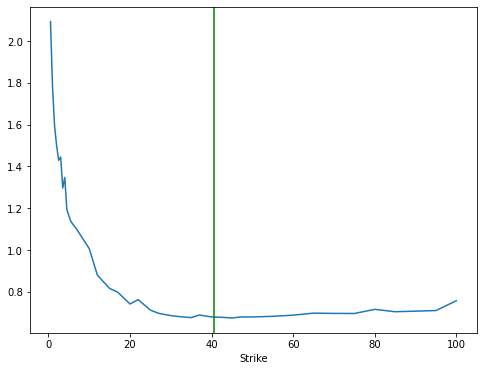

In [21]:
# para los put de la fecha 1
ax = put06_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f1.Underlying_Price.iloc[0], color='g');

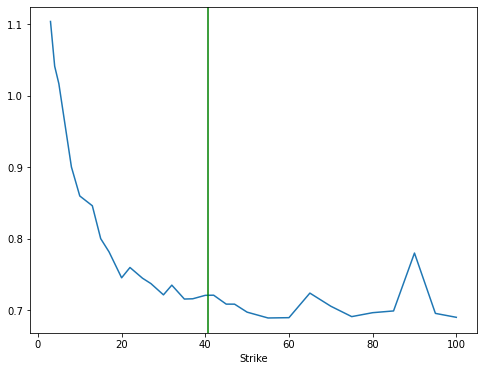

In [22]:
# para los put de la fecha 2
ax = put06_f2.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f2.Underlying_Price.iloc[0], color='g');

In [23]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

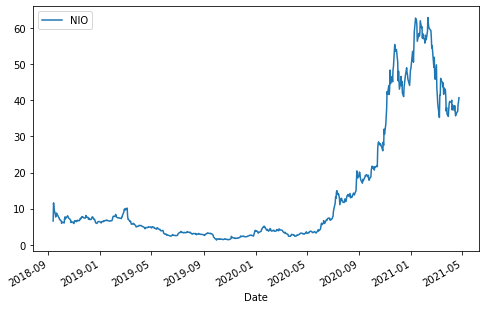

In [27]:
#Precios de cierre de Nio hasta la fecha
ticker = ['NIO']
start_date = '2018-01-01'

closes_nio = get_adj_closes(ticker, start_date)
closes_nio.plot(figsize=(8,5));
plt.legend(ticker);

In [28]:
#función para obtener rends logaritmicos
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

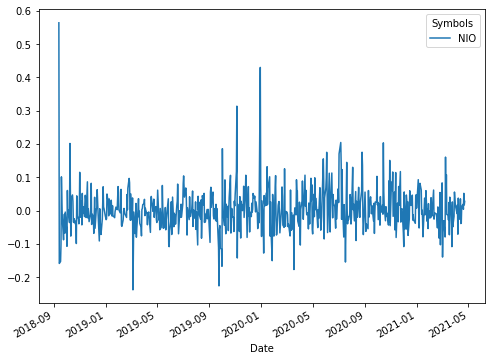

In [29]:
#rends logaritmicos
ret_nio = calc_daily_ret(closes_nio)
ret_nio.plot(figsize=(8,6));

In [30]:
#seleccion de opcion
K = 80# strike price
indice_opt = nio_opt.loc[(nio_opt.Type=='put') & (nio_opt.Strike==K) & (nio_opt.Expiry=='2022-01-21')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
917,80.0,2022-01-21,put,...,2021-04-23 15:59:37,2021-04-20 15:19:51,"{'contractSymbol': 'NIO220121P00080000', 'stri..."


In [32]:
i_opt= indice_opt.index
opcion_valuar = nio_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'NIO220121P00080000',
 'strike': 80.0,
 'currency': 'USD',
 'lastPrice': 42.85,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 3,
 'openInterest': 878,
 'bid': 41.2,
 'ask': 42.3,
 'contractSize': 'REGULAR',
 'expiration': 1642723200,
 'lastTradeDate': 1618931991,
 'impliedVolatility': 0.7164334997558592,
 'inTheMoney': True}

In [36]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  40.6401


### Simulación de precios usando rendimiento simple y logarítmico 

In [37]:
# Obtenemos el rendimiento simple
Ri = closes_nio.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,NIO
Date,
2018-09-13,0.758
2018-09-14,-0.147
2018-09-17,-0.141
2018-09-18,-0.096
2018-09-19,0.107
...,...
2021-04-19,0.019
2021-04-20,0.004
2021-04-21,0.053


In [39]:
from datetime import date

# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

nscen = 10000

# Generar rangos de fechas de días hábiles
dates = pd.date_range(today, expiry, freq='B')
ndays = len(dates)
dates

DatetimeIndex(['2021-04-23', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30', '2021-05-03', '2021-05-04',
               '2021-05-05', '2021-05-06',
               ...
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-17', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21'],
              dtype='datetime64[ns]', length=196, freq='B')

In [40]:
# Simular los rendimientos
# Rendimiento diario 
dt = 1
# Z ~ N(0,1) normal estándar (ndays, nscen)
Z = np.random.randn(ndays, nscen)

# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(Z * sigma_R * np.sqrt(dt) + mu_R * dt, index=dates)
Ri_dt

,0,1,2,...,9997,9998,9999
2021-04-23,-0.013,0.015,0.091,...,-1.068e-02,-0.079,0.022
2021-04-26,-0.115,-0.006,-0.002,...,7.584e-02,-0.008,0.020
2021-04-27,-0.045,0.025,-0.134,...,1.372e-02,0.008,-0.037
2021-04-28,0.050,0.055,0.077,...,-4.007e-02,0.031,0.034
2021-04-29,0.057,-0.161,-0.082,...,-3.089e-02,0.118,0.002
...,...,...,...,...,...,...,...
2022-01-17,-0.026,-0.011,-0.002,...,-8.575e-04,0.015,0.033
2022-01-18,-0.144,-0.132,0.059,...,1.420e-02,0.033,0.015
2022-01-19,0.045,-0.105,0.087,...,4.641e-02,-0.005,0.031
2022-01-20,-0.034,0.134,0.046,...,-2.262e-02,0.099,0.002


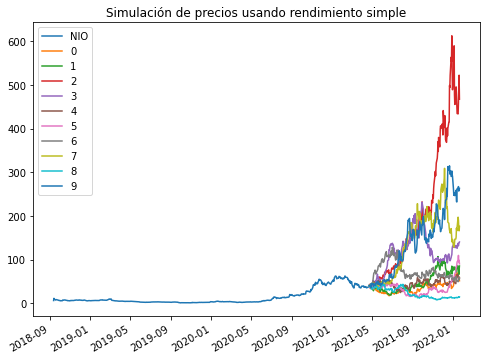

In [43]:
# Simulación del precio
S_0 = opcion_valuar.Underlying_Price
S_T = S_0*(1+Ri_dt).cumprod()
S_T.iloc[0,:] = S_0

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_nio, S_T.iloc[:, :10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

### Rendimiento Logarítmico

In [44]:
# Calcular rendimiento logarítmico
ri = calc_daily_ret(closes_nio)

# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# Simulación del rendimiento
dt = 1
Z = np.random.randn(ndays, nscen)
sim_ret_ri = pd.DataFrame(mu_r * dt + Z * sigma_r * np.sqrt(dt), index=dates )

# Simulación del precio
S_0 = closes_nio.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

50.56453867694406

In [45]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R, sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.0695569328880484, 0.06469190008270938)

Con los precios simulados debemos de encontrar el valor de la opción según la función de pago correspondiente. Para este caso es:
$$
max\{K-S(T),0\}
$$

In [46]:
opcion_valuar['JSON']

{'contractSymbol': 'NIO220121P00080000',
 'strike': 80.0,
 'currency': 'USD',
 'lastPrice': 42.85,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 3,
 'openInterest': 878,
 'bid': 41.2,
 'ask': 42.3,
 'contractSize': 'REGULAR',
 'expiration': 1642723200,
 'lastTradeDate': 1618931991,
 'impliedVolatility': 0.7164334997558592,
 'inTheMoney': True}

### Valuación usando el modelo de Black and Scholes

In [47]:
#media y desviacion estandar
mu = ret_nio.mean()[0]
sigma = ret_nio.std()[0]
mu, sigma

(0.002768512471355772, 0.06469190008270938)

In [49]:
#Tomamos la tasa libre de riesgo
# Tasa de bonos de 1 yr de fecha 22/04/2021 -> 6%
r = 0.006/360 # Tasa diaria

In [50]:
#simulamos 10 escenarios desde hoy hasta su fin
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

dates = pd.date_range(start=today, end=expiry, freq='B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-04-23', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30', '2021-05-03', '2021-05-04',
               '2021-05-05', '2021-05-06',
               ...
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-17', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21'],
              dtype='datetime64[ns]', length=196, freq='B')

In [51]:
#rends simulados
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2021-04-23,-0.055,-0.059,0.024,...,0.113,-0.037,0.079
2021-04-26,-0.084,-0.099,0.064,...,0.054,0.007,0.162
2021-04-27,-0.133,-0.012,0.008,...,0.038,0.111,0.207
2021-04-28,-0.232,-0.071,-0.013,...,-0.006,0.119,0.138
2021-04-29,-0.156,-0.128,-0.107,...,-0.024,0.064,0.019
...,...,...,...,...,...,...,...
2022-01-17,-0.347,-0.407,0.917,...,0.358,-0.728,-0.623
2022-01-18,-0.353,-0.415,0.894,...,0.407,-0.770,-0.620
2022-01-19,-0.361,-0.402,0.806,...,0.385,-0.749,-0.536
2022-01-20,-0.330,-0.476,0.855,...,0.398,-0.598,-0.556


,0,1,2,...,7,8,9
2021-04-23,40.690,40.690,40.690,...,40.690,40.690,40.690
2021-04-26,37.427,36.856,43.398,...,42.933,40.989,47.836
2021-04-27,35.616,40.201,41.002,...,42.263,45.468,50.051
2021-04-28,32.275,37.903,40.169,...,40.428,45.809,46.714
2021-04-29,34.813,35.801,36.549,...,39.707,43.366,41.464
...,...,...,...,...,...,...,...
2022-01-17,28.746,27.092,101.837,...,58.207,19.650,21.833
2022-01-18,28.597,26.871,99.495,...,61.155,18.847,21.880
2022-01-19,28.350,27.229,91.127,...,59.813,19.232,23.819
2022-01-20,29.265,25.275,95.653,...,60.566,22.382,23.328


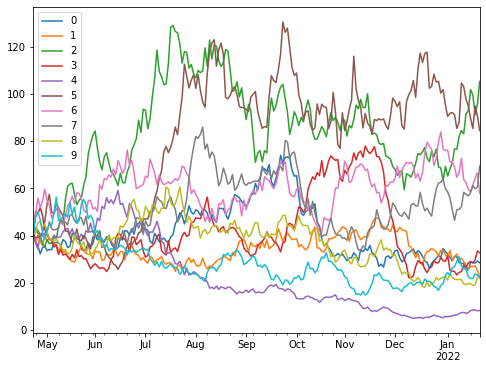

In [54]:
#escenarios de precios respectivos
S0 = closes_nio.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0, :] = S0
sim_closes.plot(figsize=(8,6));
sim_closes

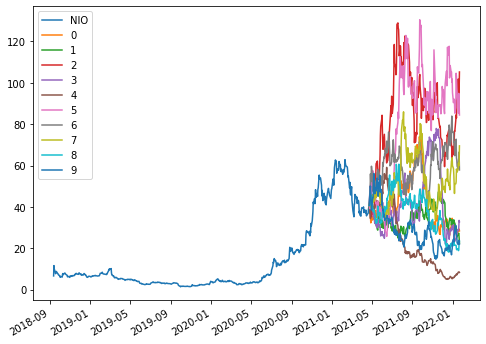

In [55]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_nio,sim_closes]).plot(figsize=(8,6));

In [56]:
opcion_valuar

Strike                                                           80.0
Expiry                                            2022-01-21 00:00:00
Type                                                              put
Symbol                                             NIO220121P00080000
Last                                                            42.85
                                          ...                        
Underlying                                                        NIO
Underlying_Price                                                40.64
Quote_Time                                        2021-04-23 15:59:37
Last_Trade_Date                                   2021-04-20 15:19:51
JSON                {'contractSymbol': 'NIO220121P00080000', 'stri...
Name: 917, Length: 19, dtype: object

In [57]:
from datetime import date
Hoy = date.today()

# strike price de la opción
K = opcion_valuar['JSON']['strike']  

# Fechas a simular
dates = pd.date_range(start= Hoy, periods = ndays, freq='B')

# Escenarios y número de días
ndays = len(dates)
nscen = 100000

# Condición inicial del precio a simular
S0 = closes_nio.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

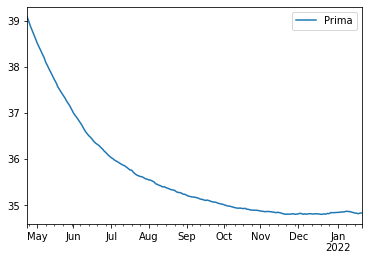

In [58]:
# Valor del put europeo
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(K-sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();

In [62]:
#Valuación de la opción:
put.iloc[-1]

Prima    34.833
Name: 2022-01-21 00:00:00, dtype: float64

In [63]:
#Con intervalo de confianza del 99%
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(34.27432490539655, 35.39180568642377)


### Precios simulados usando técnicas de reducción de varianza

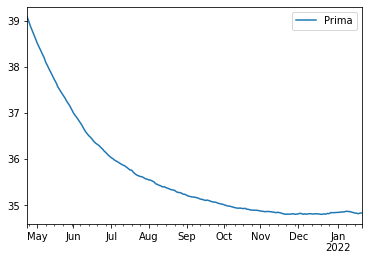

In [65]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [66]:
#Valuación de la opción:
put.iloc[-1]

Prima    34.833
Name: 2022-01-21 00:00:00, dtype: float64

In [67]:
#Con intervalo de confianza del 99%
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(34.27432490539655, 35.39180568642377)


### Análisis de la distribución de los rendimientos

### Ajustando Norm (no se ajusta muy bien)

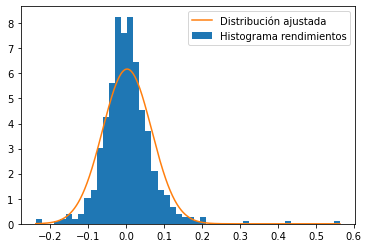

In [68]:
ren = calc_daily_ret(closes_nio) # rendimientos 
y,x,_ = plt.hist(ren['NIO'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

### Ajustando t (muy buen ajuste)

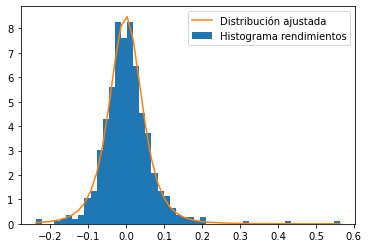

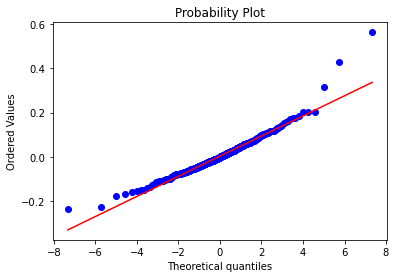

In [69]:
# rendimientos 
ren = calc_daily_ret(closes_nio) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['NIO'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()

# Q-Q
st.probplot(ren['NIO'], sparams=params[:-2], dist=dist, plot=plt);

### Valuación usando simulación: uso del histograma de rendimientos

In [70]:
#cant de dias y escenarios
ndays = len(dates) 
nscen = 10

In [73]:
#prob de ocurrencia
prob = y/np.sum(y)
values = x[1:]
prob.sum()

0.9999999999999999

In [75]:
#numeros aleatorios correspondientes a los rends
# Rendimientos simulados
ret = np.random.choice(values, ndays*nscen, p=prob)
# Fechas
dates = pd.date_range(start=Hoy,periods=ndays)
# Rendimien en Data Frame
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2021-04-23,0.067,-0.013,0.019,...,-0.013,0.019,0.115
2021-04-24,0.019,0.019,0.035,...,0.051,0.051,0.019
2021-04-25,-0.013,0.067,-0.013,...,-0.029,0.131,-0.013
2021-04-26,0.099,0.003,0.019,...,-0.029,-0.077,0.019
2021-04-27,0.003,0.067,0.003,...,-0.045,-0.077,0.019
...,...,...,...,...,...,...,...
2021-10-31,-0.029,-0.013,-0.013,...,-0.077,0.003,0.035
2021-11-01,0.083,0.035,-0.029,...,0.019,-0.093,-0.013
2021-11-02,0.003,0.003,0.019,...,0.099,0.035,0.003
2021-11-03,-0.093,0.003,0.051,...,0.019,0.051,-0.045


In [76]:
sim_closes_hist = (closes_nio.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2021-04-23,43.504,40.153,41.461,...,40.153,41.461,45.648
2021-04-24,44.329,40.914,42.930,...,42.247,43.624,46.513
2021-04-25,43.744,43.744,42.363,...,41.026,49.731,45.899
2021-04-26,48.293,43.864,43.166,...,39.841,46.025,46.769
2021-04-27,48.426,46.898,43.285,...,38.074,42.596,47.656
...,...,...,...,...,...,...,...
2021-10-31,132.966,342.442,536.495,...,464.402,287.071,106.231
2021-11-01,144.461,354.573,520.990,...,473.204,261.456,104.828
2021-11-02,144.857,355.547,530.866,...,522.422,270.718,105.116
2021-11-03,131.932,356.524,558.556,...,532.324,284.839,100.455


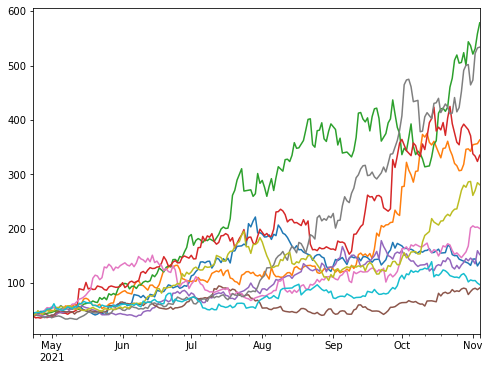

In [77]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

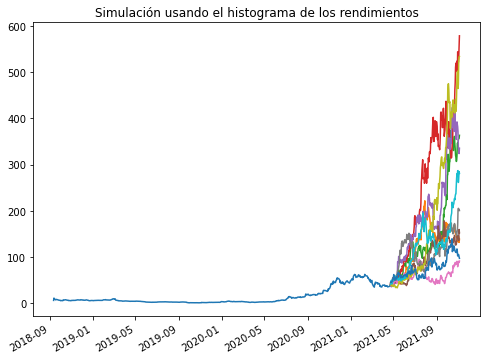

In [78]:
pd.concat([closes_nio,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [79]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 100000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_nio+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_nio.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

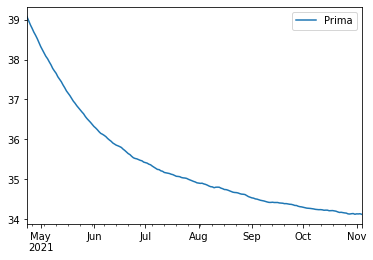

In [80]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [81]:
put_hist.iloc[-1]

Prima    34.126
Name: 2021-11-04 00:00:00, dtype: float64

In [82]:
opcion_valuar['JSON']

{'contractSymbol': 'NIO220121P00080000',
 'strike': 80.0,
 'currency': 'USD',
 'lastPrice': 42.85,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 3,
 'openInterest': 878,
 'bid': 41.2,
 'ask': 42.3,
 'contractSize': 'REGULAR',
 'expiration': 1642723200,
 'lastTradeDate': 1618931991,
 'impliedVolatility': 0.7164334997558592,
 'inTheMoney': True}

In [86]:
#confianza del 95%
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)

(33.63454416549093, 34.61794052956814)


### Solución Ana Esmeralda

# LA DIO DE BAJA